**Experiment-6 (Group B): K-Means Clustering**

In [7]:
!pip install kagglehub --quiet

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import kagglehub
from kagglehub import KaggleDatasetAdapter
from kagglehub import dataset_load
import pandas as pd
from kagglehub import dataset_download

In [10]:
path = dataset_download("kyanyoga/sample-sales-data")

df = pd.read_csv(path + "/sales_data_sample.csv", encoding="latin1")

df.head()

Using Colab cache for faster access to the 'sample-sales-data' dataset.


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
list = ["PRICEEACH", "SALES"]
data = df[list]
data.head()

,PRICEEACH,SALES
0,95.70,2871.00
1,81.35,2765.90
2,94.74,3884.34
3,83.26,3746.70
4,100.00,5205.27


In [14]:
K=range(1, 7)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [15]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,9.574691e+09
1,2,3.322892e+09
2,3,1.730554e+09
3,4,1.041212e+09
4,5,7.149693e+08
5,6,5.179923e+08


<Axes: xlabel='Clusters', ylabel='WSS'>

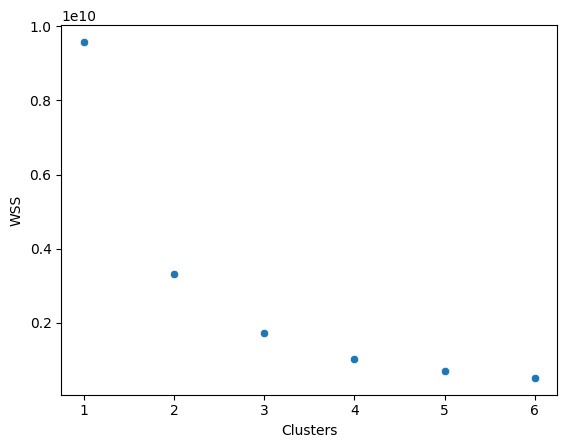

In [16]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters)